In [743]:
#load the dataset
import pandas as pd
import numpy as np
import os

election_data=pd.read_csv("election-context-2018.csv")
election_data.head()


,state,county,fips,trump16,clinton16,otherpres16,romney12,obama12,otherpres12,demsen16,...,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,ruralurban_cc
0,Alabama,Autauga,1001,18172,5936,865,17379,6363,190,6331.0,...,40.037058,13.978456,53099.0,5.591657,12.417046,75.407229,10.002112,74.065601,42.002162,2.0
1,Alabama,Baldwin,1003,72883,18458,3874,66016,18424,898,19145.0,...,35.474412,18.714851,51365.0,6.286843,9.972418,70.452889,7.842227,68.405607,42.279099,3.0
2,Alabama,Barbour,1005,5454,4871,144,5550,5912,47,4777.0,...,37.664387,16.528895,33956.0,12.824738,26.235928,87.132213,19.579752,81.364746,67.789635,6.0
3,Alabama,Bibb,1007,6738,1874,207,6132,2202,86,2082.0,...,37.329435,14.885699,39776.0,7.146827,19.301587,88.000000,15.020490,87.471774,68.352607,1.0
4,Alabama,Blount,1009,22859,2156,573,20757,2970,279,2980.0,...,37.240053,17.192916,46212.0,5.953833,19.968585,86.950243,16.643368,86.163610,89.951502,1.0


In [744]:
election_cols = [str(col) for col in election_data.columns]
election_cols

['state',
 'county',
 'fips',
 'trump16',
 'clinton16',
 'otherpres16',
 'romney12',
 'obama12',
 'otherpres12',
 'demsen16',
 'repsen16',
 'othersen16',
 'demhouse16',
 'rephouse16',
 'otherhouse16',
 'demgov16',
 'repgov16',
 'othergov16',
 'repgov14',
 'demgov14',
 'othergov14',
 'total_population',
 'cvap',
 'white_pct',
 'black_pct',
 'hispanic_pct',
 'nonwhite_pct',
 'foreignborn_pct',
 'female_pct',
 'age29andunder_pct',
 'age65andolder_pct',
 'median_hh_inc',
 'clf_unemploy_pct',
 'lesshs_pct',
 'lesscollege_pct',
 'lesshs_whites_pct',
 'lesscollege_whites_pct',
 'rural_pct',
 'ruralurban_cc']

In [745]:
num_features=len(election_data.columns)-1
print("Number of features:",num_features)

Number of features: 38


In [746]:
election_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 39 columns):
state                     3114 non-null object
county                    3114 non-null object
fips                      3114 non-null int64
trump16                   3114 non-null int64
clinton16                 3114 non-null int64
otherpres16               3114 non-null int64
romney12                  3114 non-null int64
obama12                   3114 non-null int64
otherpres12               3114 non-null int64
demsen16                  1942 non-null float64
repsen16                  1942 non-null float64
othersen16                1942 non-null float64
demhouse16                2862 non-null float64
rephouse16                2862 non-null float64
otherhouse16              2862 non-null float64
demgov16                  601 non-null float64
repgov16                  601 non-null float64
othergov16                601 non-null float64
repgov14                  2148 non-null float64


In [747]:
#Determine nature of object types
election_cat_columns=dict()
election_cat_columns_idx=dict()
election_num_columns_idx=dict()
for col in election_cols:
    if election_data[col].dtype == 'object':
        election_cat_columns[col]=election_data[col].unique()
        election_num_columns_idx[col]=election_data.columns.get_loc(col)
        print(col,":",election_cat_columns[col])
    elif col == 'ruralurban_cc':
        election_cat_columns[col]=set(election_data[col])
        print(col,":",election_cat_columns[col])
    elif np.issubdtype(election_data.at[0,col], np.number):
        election_num_columns_idx[col]=election_data.columns.get_loc(col)

state : ['Alabama' 'Arizona' 'Arkansas' 'California' 'Colorado' 'Connecticut'
 'Delaware' 'District of Columbia' 'Florida' 'Georgia' 'Hawaii' 'Idaho'
 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine'
 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi'
 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey'
 'New Mexico' 'New York' 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina' 'South Dakota'
 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']
county : ['Autauga' 'Baldwin' 'Barbour' ... 'Uinta' 'Washakie' 'Weston']
ruralurban_cc : {nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0}


In [748]:
def label_candidate(row):
    if row['trump16'] > row['clinton16']:
        if row['trump16'] > row['otherpres16']:
            return 'Trump'
        else: 
            return 'Other'
    elif row['clinton16'] > row['trump16']:
        if row['clinton16'] > row['otherpres16']:
            return 'Clinton'
        else:
            return 'Other'
    else:
        #tie
        return 'Tie'

In [749]:
# 0 is Trump
# 1 is Clinton
# 2 is Other
# 3 is Tie

In [750]:
election_data['CandidateWon'] = election_data.apply(lambda row: label_candidate(row), axis=1)

In [751]:
election_data.drop('trump16', axis=1, inplace=True)
election_data.drop('clinton16', axis=1, inplace=True)
election_data.drop('otherpres16', axis=1, inplace=True)
election_data

,state,county,fips,romney12,obama12,otherpres12,demsen16,repsen16,othersen16,demhouse16,...,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,ruralurban_cc,CandidateWon
0,Alabama,Autauga,1001,17379,6363,190,6331.0,18220.0,62.0,7544.0,...,13.978456,53099.0,5.591657,12.417046,75.407229,10.002112,74.065601,42.002162,2.0,Trump
1,Alabama,Baldwin,1003,66016,18424,898,19145.0,74021.0,248.0,0.0,...,18.714851,51365.0,6.286843,9.972418,70.452889,7.842227,68.405607,42.279099,3.0,Trump
2,Alabama,Barbour,1005,5550,5912,47,4777.0,5436.0,16.0,5297.0,...,16.528895,33956.0,12.824738,26.235928,87.132213,19.579752,81.364746,67.789635,6.0,Trump
3,Alabama,Bibb,1007,6132,2202,86,2082.0,6612.0,17.0,1971.0,...,14.885699,39776.0,7.146827,19.301587,88.000000,15.020490,87.471774,68.352607,1.0,Trump
4,Alabama,Blount,1009,20757,2970,279,2980.0,22169.0,48.0,2390.0,...,17.192916,46212.0,5.953833,19.968585,86.950243,16.643368,86.163610,89.951502,1.0,Trump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,Wyoming,Sweetwater,56037,11428,4774,693,NaN,NaN,NaN,6536.0,...,9.417120,68233.0,5.072255,9.314606,78.628507,6.238463,76.606813,10.916313,5.0,Trump
3110,Wyoming,Teton,56039,4858,6213,393,NaN,NaN,NaN,7417.0,...,11.837510,75594.0,2.123447,4.633570,46.211584,1.526877,41.769504,46.430920,7.0,Clinton
3111,Wyoming,Uinta,56041,6615,1628,296,NaN,NaN,NaN,1826.0,...,10.678218,53323.0,6.390755,10.361224,81.793082,8.806312,81.080852,43.095937,7.0,Trump
3112,Wyoming,Washakie,56043,3014,794,136,NaN,NaN,NaN,799.0,...,19.650341,46212.0,7.441860,12.577108,78.923920,10.299738,75.980688,35.954529,7.0,Trump


In [752]:
print("Total counts")
election_data['CandidateWon'].value_counts()
#so we see that trump won the most counties
#we also want to primarily use a dataset with just Trump and Clinton wins so I will split the dataset here and have
#one with other and ties and one without that

Total counts


Trump      2620
Clinton     490
Other         3
Tie           1
Name: CandidateWon, dtype: int64

In [753]:
election_data_with_other_ties = election_data.copy()

In [754]:
election_data = election_data[election_data['CandidateWon'] != 'Other']
election_data = election_data[election_data['CandidateWon'] != 'Tie']
election_data['CandidateWon'].value_counts()

Trump      2620
Clinton     490
Name: CandidateWon, dtype: int64

In [755]:
election_data['CandidateWon'].value_counts()/len(election_data['CandidateWon'])
#pretty unbalanced

Trump      0.842444
Clinton    0.157556
Name: CandidateWon, dtype: float64

In [756]:
#look into nulls other preprocessing
import numpy as np
election_data = election_data.replace('NA', np.nan)
election_data['demgov16']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3109   NaN
3110   NaN
3111   NaN
3112   NaN
3113   NaN
Name: demgov16, Length: 3110, dtype: float64

In [757]:
#check the percentage of missing data
percent_missing = election_data.isnull().sum()*100/len(election_data)
missing_value_df = pd.DataFrame({'column_name': election_data.columns,'percent_missing': percent_missing})
missing_value_df.sort_values(by=['percent_missing'], ascending=False)


,column_name,percent_missing
othergov16,othergov16,80.675241
repgov16,repgov16,80.675241
demgov16,demgov16,80.675241
demsen16,demsen16,37.652733
repsen16,repsen16,37.652733
othersen16,othersen16,37.652733
repgov14,repgov14,31.028939
othergov14,othergov14,31.028939
demgov14,demgov14,31.028939
otherhouse16,otherhouse16,8.070740


In [758]:
#check the percentage of missing data over 30%
percent_missing = election_data.isnull().sum()*100/len(election_data)
missing_value_df = pd.DataFrame({'column_name': election_data.columns,'percent_missing': percent_missing>30})
missing_value_df.sort_values(by=['percent_missing'], ascending=False)


,column_name,percent_missing
othergov16,othergov16,True
demsen16,demsen16,True
repsen16,repsen16,True
othersen16,othersen16,True
othergov14,othergov14,True
demgov14,demgov14,True
repgov14,repgov14,True
demgov16,demgov16,True
repgov16,repgov16,True
state,state,False


In [759]:
#drop everything over 30% missing data
missing_data = missing_value_df.values.tolist()
for pair in missing_data:
    if pair[1] == True:
        election_data.drop([pair[0]], axis=1, inplace=True)
        
election_data.info()
#dropped around 22 cols

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3110 entries, 0 to 3113
Data columns (total 28 columns):
state                     3110 non-null object
county                    3110 non-null object
fips                      3110 non-null int64
romney12                  3110 non-null int64
obama12                   3110 non-null int64
otherpres12               3110 non-null int64
demhouse16                2859 non-null float64
rephouse16                2859 non-null float64
otherhouse16              2859 non-null float64
total_population          3108 non-null float64
cvap                      3108 non-null float64
white_pct                 3108 non-null float64
black_pct                 3108 non-null float64
hispanic_pct              3108 non-null float64
nonwhite_pct              3108 non-null float64
foreignborn_pct           3108 non-null float64
female_pct                3108 non-null float64
age29andunder_pct         3108 non-null float64
age65andolder_pct         3108 non-null

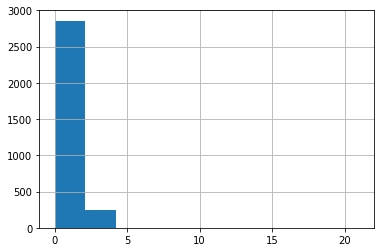

In [760]:
%matplotlib inline
import matplotlib.pyplot as plt

#determine missingness per row
missing_values_per_row=election_data.isnull().sum(axis=1)
missing_values_per_row.hist()
plt.show()
#seems like all the rows are missing very little data

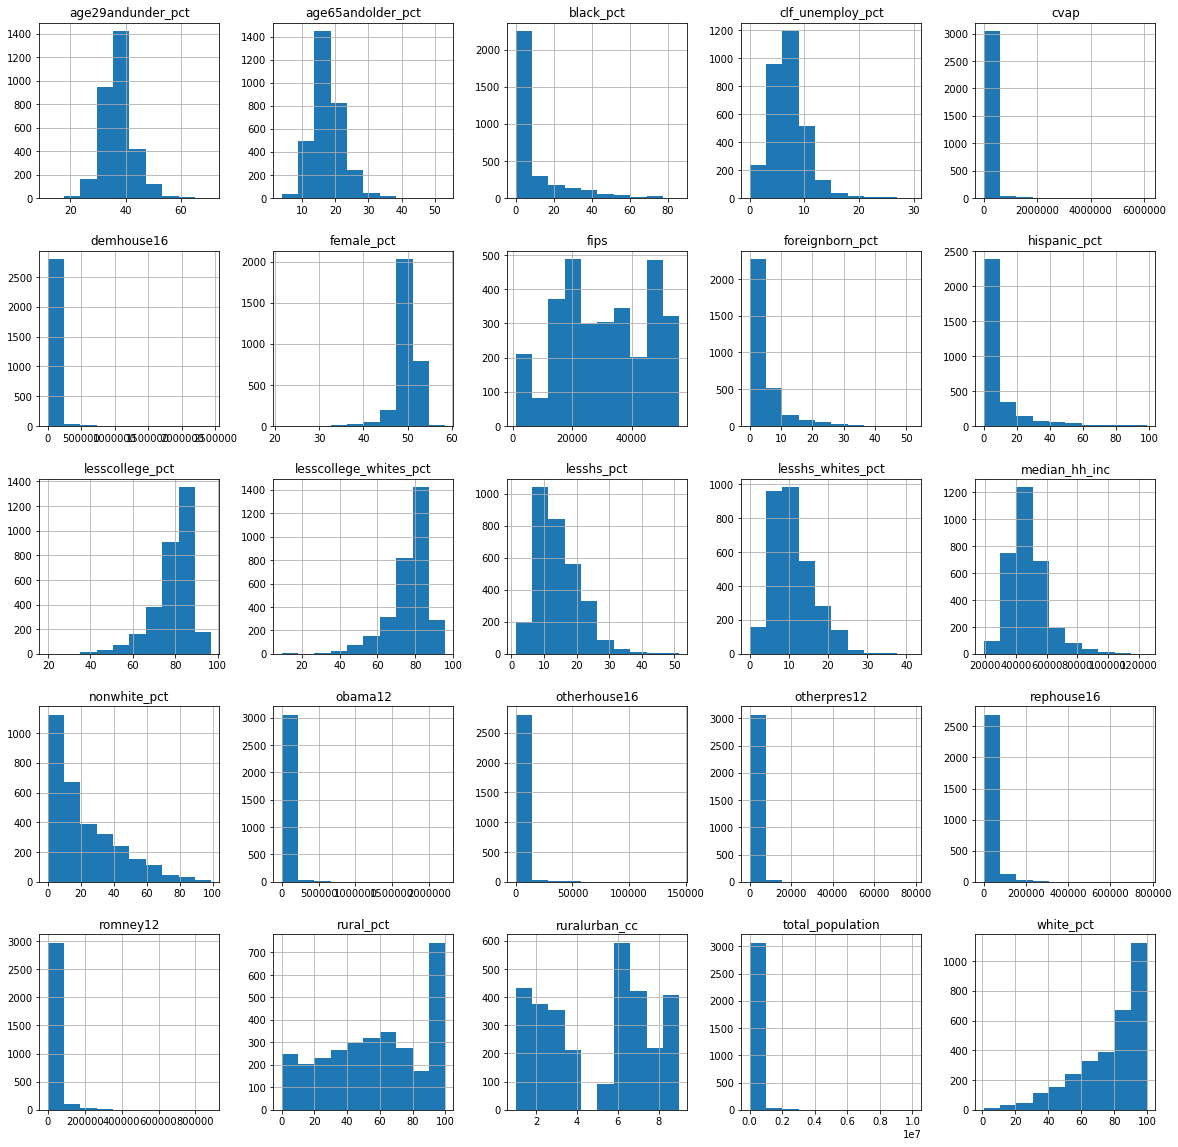

In [761]:
import matplotlib.pyplot as plt
election_data.hist(figsize=(20,20))
plt.show()
#according to the graphs does not look like anything is missing any major data

FIPS is a county code and in other words a categorical representation of every county in the U.S. It has a 100% unique rate because there is one code for every county in the U.S. so it won't contribute to our model and should be drop. 

Since FIPS is suppose to represent the counties, county itself has only about a 58% unique rate however that is probably due to counties having the same name in different states but they don't represent the same location. I will also drop county as well.

In [762]:
election_data.drop(['fips'], axis=1, inplace=True)
election_data.drop(['county'], axis=1, inplace=True)
election_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3110 entries, 0 to 3113
Data columns (total 26 columns):
state                     3110 non-null object
romney12                  3110 non-null int64
obama12                   3110 non-null int64
otherpres12               3110 non-null int64
demhouse16                2859 non-null float64
rephouse16                2859 non-null float64
otherhouse16              2859 non-null float64
total_population          3108 non-null float64
cvap                      3108 non-null float64
white_pct                 3108 non-null float64
black_pct                 3108 non-null float64
hispanic_pct              3108 non-null float64
nonwhite_pct              3108 non-null float64
foreignborn_pct           3108 non-null float64
female_pct                3108 non-null float64
age29andunder_pct         3108 non-null float64
age65andolder_pct         3108 non-null float64
median_hh_inc             3108 non-null float64
clf_unemploy_pct          3108 non-n

In [763]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
oh_encoder = OneHotEncoder(sparse=False)
label_encoder = OrdinalEncoder()

#seperate out target
Y_data = election_data[['CandidateWon']]
Y_data = Y_data.to_numpy()
Y_data_enc = label_encoder.fit_transform(Y_data)

X_data = election_data.drop(['CandidateWon'], axis=1)
print("Number of features before State OHC: {}".format(len(X_data.columns)))
one_hot = pd.get_dummies(X_data.state, prefix='State')
X_data.drop('state', axis=1, inplace=True)
X_data = X_data.join(one_hot)
cols = X_data.columns
X_data_before = X_data.copy()
X_data = X_data.to_numpy()


Number of features before State OHC: 25


In [764]:
label_encoder.categories_

[array(['Clinton', 'Trump'], dtype=object)]

In [765]:
#shuffle split
split_test = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=24109948)
for train_index, test_index in split_test.split(X_data,Y_data_enc):
    X_train_full = X_data[train_index,:]
    X_test = X_data[test_index,:]
    Y_train_full = Y_data_enc[train_index]
    Y_test = Y_data_enc[test_index]
    
split_validation = StratifiedShuffleSplit(n_splits=1,test_size=0.25, random_state=24109948)
for train_index, validation_index in split_validation.split(X_train_full, Y_train_full):
    X_train = X_train_full[train_index,:]
    X_validation = X_train_full[validation_index,:]
    Y_train = Y_train_full[train_index]
    Y_validation = Y_train_full[validation_index]
    
#reshape labels for sklearn
Y_train_full =  Y_train_full.reshape((Y_train_full.shape[0],))
Y_train = Y_train.reshape((Y_train.shape[0],))
Y_validation= Y_validation.reshape((Y_validation.shape[0],))
Y_test = Y_test.reshape((Y_test.shape[0],))

#shuffle split
split_test = ShuffleSplit(n_splits=1,test_size=0.2)
for train_index, test_index in split_test.split(X_data,Y_data):
    X_train_full = X_data.iloc[train_index,:]
    X_test = X_data.iloc[test_index,:]
    Y_train_full = Y_data.iloc[train_index]
    Y_test = Y_data.iloc[test_index]
    
split_validation = ShuffleSplit(n_splits=1,test_size=0.25)
for train_index, validation_index in split_validation.split(X_train_full, Y_train_full):
    X_train = X_train_full.iloc[train_index,:]
    X_validation = X_train_full.iloc[validation_index,:]
    Y_train = Y_train_full.iloc[train_index]
    Y_validation = Y_train_full.iloc[validation_index]

In [766]:
#Checking to see if they have the same prevalance
print("Dataset\t\tPercent")
print("Training\t"+str(np.sum(Y_train)/len(Y_train)))
print("Validation\t"+str(np.sum(Y_validation)/len(Y_validation)))
print("Test\t\t"+str(np.sum(Y_test)/len(Y_test)))

Dataset		Percent
Training	0.842443729903537
Validation	0.842443729903537
Test		0.842443729903537


In [767]:
#okay to impute the whole data set as the categorical data does not have missing values
X_train = imp_median.fit_transform(X_train)
X_validation = imp_median.transform(X_validation)
X_test = imp_median.transform(X_test)
X_train_full = imp_median.transform(X_train_full)
#X_train_full = np.concatenate((X_train, X_validation), axis=0)


In [768]:
#no more missing values
percent_missing = pd.DataFrame(X_train_full, columns = cols).isnull().sum()*100/len(X_train_full)
missing_value_df = pd.DataFrame({'column_name': cols,'percent_missing': percent_missing>0})
missing_value_df.sort_values(by=['percent_missing'], ascending=False)

,column_name,percent_missing
romney12,romney12,False
State_New York,State_New York,False
State_New Jersey,State_New Jersey,False
State_New Hampshire,State_New Hampshire,False
State_Nevada,State_Nevada,False
...,...,...
State_Alabama,State_Alabama,False
ruralurban_cc,ruralurban_cc,False
rural_pct,rural_pct,False
lesscollege_whites_pct,lesscollege_whites_pct,False


#no more missing values
percent_missing = pd.DataFrame(X_train_full, columns = X_data.columns).isnull().sum()*100/len(X_train_full)
missing_value_df = pd.DataFrame({'column_name': X_data.columns,'percent_missing': percent_missing>0})
missing_value_df.sort_values(by=['percent_missing'], ascending=False)


In [769]:
#k-folds
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

In [770]:
#standardize
from sklearn.preprocessing import StandardScaler
svm_scaler = StandardScaler()
X_train_scaled=svm_scaler.fit_transform(X_train)
X_validation_scaled=svm_scaler.transform(X_validation)
X_test_scaled=svm_scaler.transform(X_test)
X_train_full_scaled=svm_scaler.transform(X_train_full)

MODELING


In [771]:
#peformance metric functions
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
import numpy as np

#A list of keys for the dictionary returned by p1_metrics
metric_keys = ['auc','f1','accuracy','sensitivity','specificity', 'precision']

def p1_metrics(y_true,y_pred,include_cm=True):
    cm = confusion_matrix(y_true,y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    if include_cm:
        return {
            'auc': roc_auc_score(y_true,y_pred),
            'f1': f1_score(y_true,y_pred),
            'accuracy': (tp+tn)/np.sum(cm),
            'sensitivity': tp/(tp+fn),
            'specificity': tn/(tn+fp),
            'precision': tp/(tp+fp),
            'confusion_matrix': cm}
    else:
        return {
            'auc': roc_auc_score(y_true,y_pred),
            'f1': f1_score(y_true,y_pred),
            'accuracy': (tp+tn)/np.sum(cm),
            'sensitivity': tp/(tp+fn),
            'specificity': tn/(tn+fp),
            'precision': tp/(tp+fp)}

#This wrapper can be used to return multiple performance metrics during cross-validation
def p1_metrics_scorer(clf,X,y_true):
    y_pred=clf.predict(X)
    return p1_metrics(y_true,y_pred,include_cm=False)

## Naive Bayes

In [772]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,Y_train)
gnb_y_pred=gnb.predict(X_train)
gnb_metrics = p1_metrics(Y_train, gnb_y_pred)
print("NB Training Metrics")
for metric in gnb_metrics:
    print(metric+":",gnb_metrics[metric])


NB Training Metrics
auc: 0.6812652541932804
f1: 0.9316656497864552
accuracy: 0.879957127545552
sensitivity: 0.9713740458015268
specificity: 0.391156462585034
precision: 0.8950762016412661
confusion_matrix: [[ 115  179]
 [  45 1527]]


## SVM

In [773]:
from sklearn.svm import SVC
svmc = SVC()
svmc.fit(X_train_scaled,Y_train)
svmc_y_pred=svmc.predict(X_train_scaled)
svmc_metrics= p1_metrics(Y_train, svmc_y_pred)
print("SVM Training Metrics")
for metric in svmc_metrics:
    print(metric+":",svmc_metrics[metric])

SVM Training Metrics
auc: 0.8851132055875786
f1: 0.9739730322985262
accuracy: 0.9555198285101822
sensitivity: 0.9879134860050891
specificity: 0.782312925170068
precision: 0.9604205318491033
confusion_matrix: [[ 230   64]
 [  19 1553]]


## Random Forest

In [774]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
rf_y_pred=rf.predict(X_train)
rf_metrics = p1_metrics(Y_train, rf_y_pred)
print("Random Forest Training Metrics")
for metric in rf_metrics:
    print(metric+":",rf_metrics[metric])

Random Forest Training Metrics
auc: 1.0
f1: 1.0
accuracy: 1.0
sensitivity: 1.0
specificity: 1.0
precision: 1.0
confusion_matrix: [[ 294    0]
 [   0 1572]]


## Logistic Regression

In [775]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train,Y_train)
lr_y_pred = lr.predict(X_train)
lr_metrics = p1_metrics(Y_train, lr_y_pred)
print("Logistic Regression Training Metrics")
for metric in lr_metrics:
    print(metric+":",lr_metrics[metric])

Logistic Regression Training Metrics
auc: 0.8971283169756452
f1: 0.9748110831234257
accuracy: 0.9571275455519829
sensitivity: 0.9847328244274809
specificity: 0.8095238095238095
precision: 0.9650872817955112
confusion_matrix: [[ 238   56]
 [  24 1548]]


## K-Nearest Neighbors

In [776]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
knn_y_pred = knn.predict(X_train)
knn_metrics = p1_metrics(Y_train, knn_y_pred)
print("KNN Training Metrics")
for metric in knn_metrics:
    print(metric+":",knn_metrics[metric])

KNN Training Metrics
auc: 0.8667237887521421
f1: 0.970946579194002
accuracy: 0.9501607717041801
sensitivity: 0.9885496183206107
specificity: 0.7448979591836735
precision: 0.9539594843462247
confusion_matrix: [[ 219   75]
 [  18 1554]]


## Validation set on Models

In [777]:
gnb_y_pred=gnb.predict(X_validation)
gnb_metrics = p1_metrics(Y_validation, gnb_y_pred)
print("NB Validation Metrics")
for metric in gnb_metrics:
    print(metric+":",gnb_metrics[metric])
svmc_y_pred=svmc.predict(X_validation_scaled)
svmc_metrics= p1_metrics(Y_validation, svmc_y_pred)
print("SVM Validation Metrics")
for metric in svmc_metrics:
    print(metric+":",svmc_metrics[metric])
rf_y_pred=rf.predict(X_validation)
rf_metrics = p1_metrics(Y_validation, rf_y_pred)
print("Random Forest Validation Metrics")
for metric in rf_metrics:
    print(metric+":",rf_metrics[metric])
lr_y_pred = lr.predict(X_validation)
lr_metrics = p1_metrics(Y_validation, lr_y_pred)
print("Logistic Regression Training Metrics")
for metric in lr_metrics:
    print(metric+":",lr_metrics[metric])
knn_y_pred = knn.predict(X_validation)
knn_metrics = p1_metrics(Y_validation, knn_y_pred)
print("KNN Training Metrics")
for metric in knn_metrics:
    print(metric+":",knn_metrics[metric])

NB Validation Metrics
auc: 0.6601106091291479
f1: 0.9289617486338797
accuracy: 0.8745980707395499
sensitivity: 0.9732824427480916
specificity: 0.3469387755102041
precision: 0.8885017421602788
confusion_matrix: [[ 34  64]
 [ 14 510]]
SVM Validation Metrics
auc: 0.876927870384795
f1: 0.9727699530516433
accuracy: 0.9533762057877814
sensitivity: 0.9885496183206107
specificity: 0.7653061224489796
precision: 0.9574861367837338
confusion_matrix: [[ 75  23]
 [  6 518]]
Random Forest Validation Metrics
auc: 0.8922339928337747
f1: 0.975517890772128
accuracy: 0.9581993569131833
sensitivity: 0.9885496183206107
specificity: 0.7959183673469388
precision: 0.9628252788104089
confusion_matrix: [[ 78  20]
 [  6 518]]
Logistic Regression Training Metrics
auc: 0.925085683128213
f1: 0.9790874524714829
accuracy: 0.9646302250803859
sensitivity: 0.982824427480916
specificity: 0.8673469387755102
precision: 0.9753787878787878
confusion_matrix: [[ 85  13]
 [  9 515]]
KNN Training Metrics
auc: 0.7978657111699643


## Cross Validation

In [778]:
#Summarizes model performance results produced during cross-validation
def collate_cv_results(cv_results,display=True):
    cv_stats=dict()
    for k in cv_results:
        cv_stats[k+"_mean"]=np.mean(cv_results[k])
        cv_stats[k+"_std"]=np.std(cv_results[k])
        if display:
            print(k,cv_stats[k+"_mean"],"("+str(cv_stats[k+"_std"])+")")
    return cv_stats

In [779]:
from sklearn.model_selection import cross_validate
gnb_cv = GaussianNB()
gnb_cv_results = cross_validate(gnb_cv, X_train_full, Y_train_full, cv=skf, scoring=p1_metrics_scorer)
#summarize each metric
gnb_cv_stats=collate_cv_results(gnb_cv_results)

fit_time 0.0037999629974365236 (0.0007476410897885228)
score_time 0.002399110794067383 (0.0004898631373585297)
test_auc 0.6941969654868057 (0.02454120459348852)
test_f1 0.9322060101940368 (0.003603111944141537)
test_accuracy 0.881425096765331 (0.0067099464188460885)
test_sensitivity 0.9675565405159677 (0.006685808057978901)
test_specificity 0.4208373904576437 (0.05242195485058093)
test_precision 0.8994271170843595 (0.007624529889287494)


In [780]:
svm_cv = SVC(random_state=24109948)
svm_cv_results = cross_validate(svm_cv, X_train_full_scaled, Y_train_full, cv=skf, scoring=p1_metrics_scorer,n_jobs=-1)
#summarize each metric
svm_cv_stats=collate_cv_results(svm_cv_results)

fit_time 0.10479984283447266 (0.019505910447364667)
score_time 0.03919973373413086 (0.0068807466983332385)
test_auc 0.844908242317082 (0.022984588479080217)
test_f1 0.9636422788344111 (0.007175029602298011)
test_accuracy 0.9376984800368475 (0.012143221529663474)
test_sensitivity 0.9804364132287761 (0.0106125051056846)
test_specificity 0.709380071405388 (0.04300685269188763)
test_precision 0.9474815130489966 (0.007667871096657542)


In [781]:
rf_cv = RandomForestClassifier(random_state=24109948)
rf_cv_results = cross_validate(rf_cv, X_train_full, Y_train_full, cv=skf, scoring=p1_metrics_scorer)
#summarize each metric
rf_cv_stats=collate_cv_results(rf_cv_results)
#print(rf_cv_results)

fit_time 0.3617990016937256 (0.03324703316145685)
score_time 0.014000892639160156 (0.001414752022401494)
test_auc 0.8788208057412914 (0.006824364828819283)
test_f1 0.96927879814777 (0.004150292406742639)
test_accuracy 0.9477475293528238 (0.0066248175443763095)
test_sensitivity 0.9794851687691783 (0.011941916820836855)
test_specificity 0.7781564427134047 (0.0241079228882959)
test_precision 0.9594063161697257 (0.004012409939680436)


In [782]:
lr_cv = LogisticRegression(max_iter=10000)
lr_cv_results = cross_validate(lr_cv, X_train_full, Y_train_full, cv=skf, scoring=p1_metrics_scorer)
#summarize each metric
lr_cv_stats=collate_cv_results(lr_cv_results)
#print(rf_cv_results)

fit_time 3.114640998840332 (0.9982248088735924)
score_time 0.003007793426513672 (0.0006236562033252587)
test_auc 0.9070963212492169 (0.023100107382254664)
test_f1 0.9768363697467219 (0.0038366269160691707)
test_accuracy 0.9606078236487197 (0.0066979060160645395)
test_sensitivity 0.9852085464257303 (0.004110099085646219)
test_specificity 0.8289840960727037 (0.047841477748720204)
test_precision 0.9686652232588147 (0.008416244769605423)


In [783]:
knn_cv = KNeighborsClassifier(n_neighbors=3)
knn_cv_results = cross_validate(knn_cv, X_train_full, Y_train_full, cv=skf, scoring=p1_metrics_scorer)
#summarize each metric
knn_cv_stats=collate_cv_results(knn_cv_results)
#print(rf_cv_results)

fit_time 0.0016004085540771485 (0.0004893180059044131)
score_time 0.0380000114440918 (0.003344702436399722)
test_auc 0.783381194950785 (0.015464448506523284)
test_f1 0.9484455324986619 (0.001445819785966833)
test_accuracy 0.9111722544099943 (0.0023941322554268773)
test_sensitivity 0.9699431753608365 (0.006848935502398678)
test_specificity 0.5968192145407335 (0.03704800645965352)
test_precision 0.9279518414919827 (0.005434370600208307)


## SVM Hyperparameter Tuning

In [784]:
#Summarizes model performance results produced during hyperparameter tuning
def collate_ht_results(ht_results,metric_keys=metric_keys,display=True):
    ht_stats=dict()
    for metric in metric_keys:
        ht_stats[metric+"_mean"] = ht_results.cv_results_["mean_test_"+metric][ht_results.best_index_]
        ht_stats[metric+"_std"] = metric_std = ht_results.cv_results_["std_test_"+metric][ht_results.best_index_]
        if display:
            print("test_"+metric,ht_stats[metric+"_mean"],"("+str(ht_stats[metric+"_std"])+")")
    return ht_stats

In [785]:
from sklearn.model_selection import RandomizedSearchCV
import time
svm_rs_params={'kernel':('linear', 'rbf'), 'C':[1]+list(range(5,101,5)), 'gamma':('auto','scale')}
rs = RandomizedSearchCV(
    SVC(),
    svm_rs_params,
    n_iter=16,
    scoring=p1_metrics_scorer,
    refit='auc',
    cv=skf,
    n_jobs=-1,
    return_train_score=False,
    random_state=24109948)
svm_rs_start = time.time()
svm_rs=rs.fit(X_train_full_scaled,Y_train_full)
svm_rs_end = time.time()

In [786]:
print("Total RandomizedSearchCV Time (min):",(svm_rs_end-svm_rs_start)/60)

Total RandomizedSearchCV Time (min): 0.4798031528790792


In [787]:
svm_rs.cv_results_['params'][svm_rs.best_index_]

{'kernel': 'linear', 'gamma': 'auto', 'C': 60}

In [788]:
print("SVM RS Cross-validation Metrics")
svm_rs_stats = collate_ht_results(svm_rs)

SVM RS Cross-validation Metrics
test_auc 0.9148190082678467 (0.01742402214633226)
test_f1 0.975002101312674 (0.004352002358301306)
test_accuracy 0.9577973867300187 (0.007191505420420539)
test_sensitivity 0.9775769973860667 (0.01104946889461158)
test_specificity 0.8520610191496267 (0.04075706875783712)
test_precision 0.9725809410245605 (0.007238217236891085)


## RandomForest Hyperparameter Tuning

In [789]:
from math import *
num_training_samples=X_train_full.shape[0]
depth_limit=ceil(log2(num_training_samples)-1)
print("Depth Limit:",depth_limit)

Depth Limit: 11


In [790]:
from sklearn.model_selection import RandomizedSearchCV
num_features=X_train.shape[1]
rf_params={'criterion':('gini', 'entropy'),'max_depth':(None,depth_limit),'n_estimators':[10,20,30,40,50,60,70,80,90,100]}
rf_rs = RandomizedSearchCV(
    RandomForestClassifier(),
    rf_params,
    n_iter=16,
    scoring=p1_metrics_scorer,
    refit="auc",
    cv=skf,
    n_jobs=-1,
    return_train_score=False,
    random_state=24109948
)
rf_rs_start = time.time()
rf_rs=rf_rs.fit(X_train_full,Y_train_full)
rf_rs_end = time.time()

In [791]:
print("Total RandomizedSearchCV Time (min):",(rf_rs_end-rf_rs_start)/60)

Total RandomizedSearchCV Time (min): 0.1401166598002116


In [792]:
rf_rs.cv_results_['params'][rf_rs.best_index_]

{'n_estimators': 40, 'max_depth': None, 'criterion': 'gini'}

In [793]:
print("RF RS Cross-validation Metrics")
rf_rs_stats = collate_ht_results(rf_rs)

RF RS Cross-validation Metrics
test_auc 0.8805941395039912 (0.01681880474102597)
test_f1 0.9700090447496759 (0.003535346274112389)
test_accuracy 0.948955580874807 (0.005767734941426906)
test_sensitivity 0.9804352767359928 (0.01082576638837324)
test_specificity 0.7807530022719896 (0.04145915759743939)
test_precision 0.9599464099545643 (0.007145280750505871)


## KNN Hyperparameter Tuning

In [794]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
knn_params = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [795]:
from sklearn.model_selection import RandomizedSearchCV
num_features=X_train.shape[1]
knn_rs = RandomizedSearchCV(
    KNeighborsClassifier(),
    knn_params,
    n_iter=16,
    scoring=p1_metrics_scorer,
    refit="auc",
    cv=skf,
    n_jobs=-1,
    return_train_score=False,
    random_state=24109948
)
knn_rs_start = time.time()
knn_rs=knn_rs.fit(X_train_full,Y_train_full)
knn_rs_end = time.time()

In [796]:
print('Best leaf_size:', knn_rs.best_estimator_.get_params()['leaf_size'])
print('Best p:', knn_rs.best_estimator_.get_params()['p'])
print('Best n_neighbors:', knn_rs.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 39
Best p: 1
Best n_neighbors: 4


In [797]:
print("Total RandomizedSearchCV Time (min):",(knn_rs_end-knn_rs_start)/60)

Total RandomizedSearchCV Time (min): 0.0434000293413798


In [798]:
print("KNN RS Cross-validation Metrics")
knn_rs_stats = collate_ht_results(knn_rs)

KNN RS Cross-validation Metrics
test_auc 0.8380055934921347 (0.017344759002460245)
test_f1 0.9545118860561874 (0.005843983283727815)
test_accuracy 0.9228269213675627 (0.009500529187447971)
test_sensitivity 0.9618274803954995 (0.012729032516072445)
test_specificity 0.7141837065887698 (0.03902181222545667)
test_precision 0.9474420671385204 (0.006388564817046693)


## Feature Selection

In [799]:
#split the data
split = StratifiedShuffleSplit(n_splits=1,test_size=5/6, random_state=24109948)
for train_index, test_index in split.split(X_train, Y_train):
    X_fs_train = X_train[train_index,:]
    #X_fs_train_scaled = X_train_proj_scaled[train_index,:]
    X_fs_test = X_train[test_index,:]
    X_fs_test_scaled = X_train_scaled[test_index,:]
    Y_fs_train = Y_train[train_index]
    Y_fs_test = Y_train[test_index]

0) white_pct 0.09829356564422641 (0.12846630573019727) S/I Ratio: 1.3069655667511453
1) nonwhite_pct 0.08025021752788727 (0.11471995411289591) S/I Ratio: 1.429528263559289
2) demhouse16 0.07749435378373402 (0.11677108894290286) S/I Ratio: 1.5068335077517994
3) black_pct 0.07338157149138035 (0.09470017516029798) S/I Ratio: 1.2905171316945943
4) obama12 0.059796610913934754 (0.10001797693596962) S/I Ratio: 1.672636214783568
5) rephouse16 0.05239232118592294 (0.06546662294100913) S/I Ratio: 1.249546144533086
6) total_population 0.04344267358038817 (0.07874021177647417) S/I Ratio: 1.812508422870658
7) lesscollege_whites_pct 0.040021160413481464 (0.06779414000781418) S/I Ratio: 1.693957379231242
8) otherpres12 0.038835083370900435 (0.06851850056468933) S/I Ratio: 1.7643453964110971
9) clf_unemploy_pct 0.036923778299482554 (0.0564532714894253) S/I Ratio: 1.5289137268548822
10) cvap 0.036516141308356544 (0.07383095821485536) S/I Ratio: 2.0218718509000704
11) rural_pct 0.0347290814675666 (0.07

C:\Users\Carlos\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, 'Mean decrease in impurity')

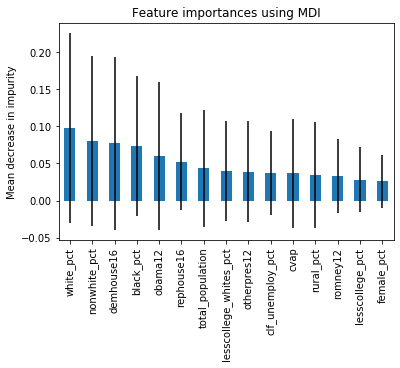

In [800]:
import matplotlib.pyplot as plt
rf_fs = RandomForestClassifier()
rf_fs.fit(X_fs_train,Y_fs_train)
importances = rf_fs.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_fs.estimators_], axis=0)

ix = np.argsort(importances)[::-1]
importances=importances[ix]
std=std[ix]
feature_names=cols[ix]
si_ratios=[i/j for i,j in zip(std,importances)]
for i in range(len(importances)):
    
    print(str(i) + ")",feature_names[i],importances[i],"("+str(std[i])+")","S/I Ratio:",si_ratios[i])
    
import pandas as pd

#let's plot only the first 15 features to make the plot more visually appealing
forest_importances = pd.Series(importances[:15],index=cols[ix[:15]])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std[:15], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

            feature_name  feature_importance
0             demhouse16            0.010392
1              white_pct            0.006495
2           nonwhite_pct            0.005119
3                obama12            0.004913
4             rephouse16            0.003203
..                   ...                 ...
69     age65andolder_pct           -0.000360
70     lesshs_whites_pct           -0.000566
71  State_South Carolina           -0.000630
72          State_Oregon           -0.000720
73     age29andunder_pct           -0.000836

[74 rows x 2 columns]


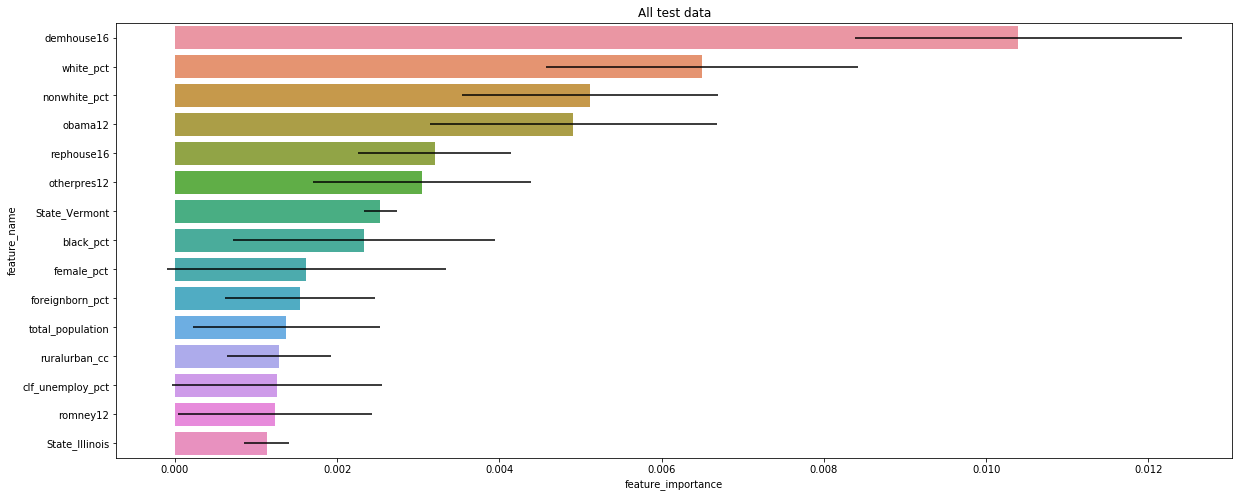

              feature_name  feature_importance
0               female_pct            0.001396
1                black_pct            0.001352
2          foreignborn_pct            0.001249
3         total_population            0.001190
4         clf_unemploy_pct            0.000955
..                     ...                 ...
69       age65andolder_pct           -0.001411
70  lesscollege_whites_pct           -0.001425
71            otherhouse16           -0.001499
72       age29andunder_pct           -0.001543
73              lesshs_pct           -0.001587

[74 rows x 2 columns]


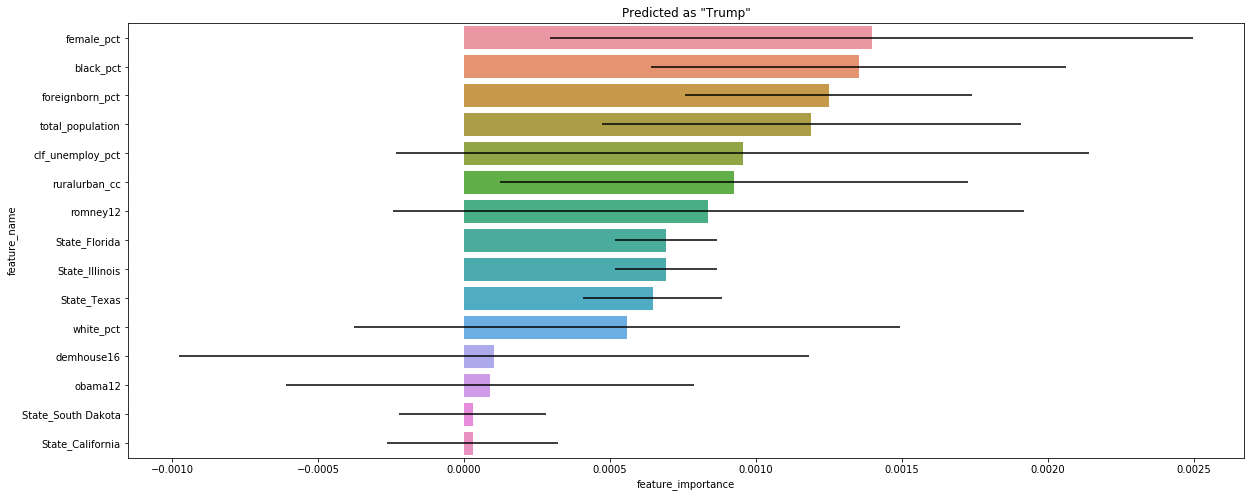

                  feature_name  feature_importance
0                   demhouse16            0.034330
1                   rephouse16            0.027938
2                    white_pct            0.020412
3                State_Vermont            0.020103
4                 nonwhite_pct            0.018660
..                         ...                 ...
69  State_District of Columbia            0.000000
70              State_Delaware            0.000000
71           State_Connecticut            0.000000
72               State_Wyoming            0.000000
73                State_Oregon           -0.005052

[74 rows x 2 columns]


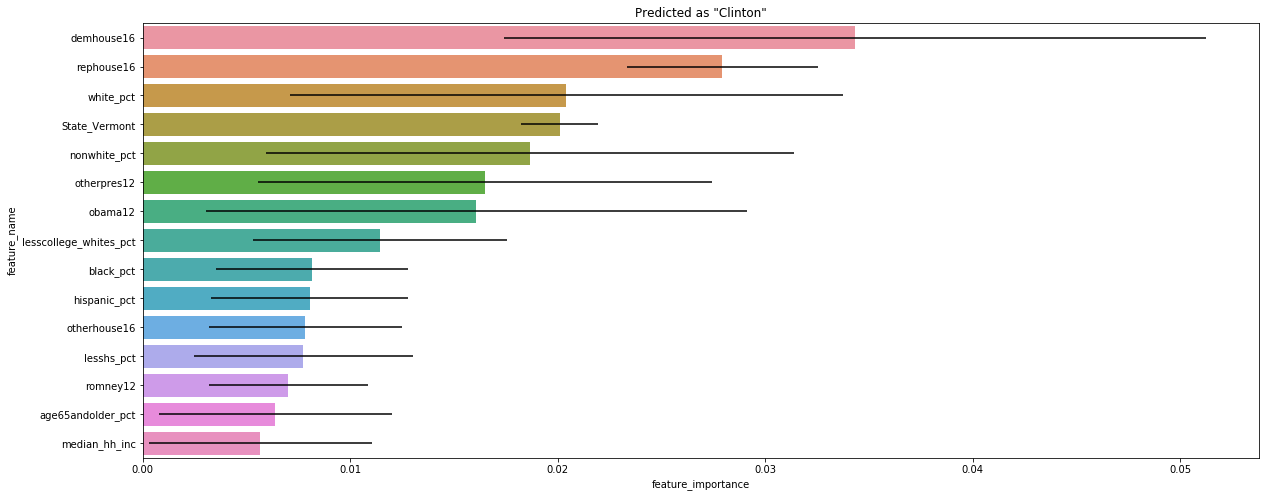

In [801]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns


def plot_feature_importances(model, x, y, title, cols):
    result = permutation_importance(model, x, y, n_repeats=50, scoring="accuracy",random_state=24109948)
    indices = np.argsort(result.importances_mean)[::-1]
    df = pd.DataFrame({'feature_name': cols[indices], 'feature_importance': result.importances_mean[indices]})
    print(df)
    #top_importances = pd.Series(result.importances_mean[indices[:15]],index=cols[indices[:15]])
    
    plt.figure(figsize=(20, 8))
    sns.barplot(data=df[:15], x='feature_importance', y='feature_name', xerr=result.importances_std[indices[:15]])
    plt.title(title)
    plt.show()

plot_feature_importances(rf_fs, X_fs_test, Y_fs_test, 'All test data', cols)

y_pred = rf_fs.predict(X_fs_test)
plot_feature_importances(rf_fs, X_fs_test[y_pred == 1], Y_fs_test[y_pred == 1], 'Predicted as "Trump"', cols)
plot_feature_importances(rf_fs, X_fs_test[y_pred == 0], Y_fs_test[y_pred == 0], 'Predicted as "Clinton"', cols)

# 6 Features

In [802]:
features_to_select=list(range(6))
print(ix[features_to_select])

[ 8 11  3  9  1  4]


In [803]:
X_fs_reduced = X_fs_test[:,ix[features_to_select]]
X_validation_reduced = X_validation[:,ix[features_to_select]]
gnb_fs6 = GaussianNB()
gnb_fs6.fit(X_fs_reduced,Y_fs_test)
gnb_fs6_y_pred=gnb_fs6.predict(X_validation_reduced)
gnb_fs6_metrics = p1_metrics(Y_validation, gnb_fs6_y_pred)
print("NB Validation Metrics")
for metric in gnb_fs6_metrics:
    print(metric+":",gnb_fs6_metrics[metric])

NB Validation Metrics
auc: 0.8074466427792493
f1: 0.9491525423728814
accuracy: 0.9131832797427653
sensitivity: 0.9618320610687023
specificity: 0.6530612244897959
precision: 0.9368029739776952
confusion_matrix: [[ 64  34]
 [ 20 504]]


In [804]:
X_fs_reduced_scaled = X_fs_test_scaled[:,ix[features_to_select]]
X_validation_reduced_scaled = X_validation_scaled[:,ix[features_to_select]]
svmc_fs6 = SVC()
svmc_fs6.fit(X_fs_reduced_scaled,Y_fs_test)
svmc_fs6_y_pred=svmc_fs6.predict(X_validation_reduced_scaled)
svmc_fs6_metrics= p1_metrics(Y_validation, svmc_fs6_y_pred)
print("SVM Validation Metrics")
for metric in svmc_fs6_metrics:
    print(metric+":",svmc_fs6_metrics[metric])

SVM Validation Metrics
auc: 0.8176117775354417
f1: 0.963855421686747
accuracy: 0.9372990353697749
sensitivity: 0.9923664122137404
specificity: 0.6428571428571429
precision: 0.9369369369369369
confusion_matrix: [[ 63  35]
 [  4 520]]


In [805]:
rf_fs6 = RandomForestClassifier()
rf_fs6.fit(X_fs_reduced,Y_fs_test)
rf_fs6_y_pred=rf_fs6.predict(X_validation_reduced)
rf_fs6_metrics= p1_metrics(Y_validation,rf_fs6_y_pred)
print("RF Validation Metrics")
for metric in rf_fs6_metrics:
    print(metric+":",rf_fs6_metrics[metric])

RF Validation Metrics
auc: 0.8539881601495559
f1: 0.9622641509433962
accuracy: 0.9356913183279743
sensitivity: 0.9732824427480916
specificity: 0.7346938775510204
precision: 0.9514925373134329
confusion_matrix: [[ 72  26]
 [ 14 510]]


In [806]:
lr_fs6 = LogisticRegression(max_iter=10000)
lr_fs6.fit(X_fs_reduced,Y_fs_test)
lr_fs6_y_pred = lr_fs6.predict(X_validation_reduced)
lr_fs6_metrics = p1_metrics(Y_validation, lr_fs6_y_pred)
print("Logistic Regression Training Metrics")
for metric in lr_fs6_metrics:
    print(metric+":",lr_fs6_metrics[metric])

Logistic Regression Training Metrics
auc: 0.8074076959027886
f1: 0.9620721554116559
accuracy: 0.9340836012861736
sensitivity: 0.9923664122137404
specificity: 0.6224489795918368
precision: 0.933572710951526
confusion_matrix: [[ 61  37]
 [  4 520]]


In [807]:
knn_fs6 = KNeighborsClassifier(n_neighbors=3)
knn_fs6.fit(X_fs_reduced, Y_fs_test)
knn_fs6_y_pred = knn_fs6.predict(X_validation_reduced)
knn_fs6_metrics = p1_metrics(Y_validation, knn_fs6_y_pred)
print("KNN Training Metrics")
for metric in knn_fs6_metrics:
    print(metric+":",knn_fs6_metrics[metric])

KNN Training Metrics
auc: 0.8412525315469699
f1: 0.95346628679962
accuracy: 0.9212218649517685
sensitivity: 0.9580152671755725
specificity: 0.7244897959183674
precision: 0.9489603024574669
confusion_matrix: [[ 71  27]
 [ 22 502]]


In [808]:
features_to_select=list(range(11))
print(ix[features_to_select])

[ 8 11  3  9  1  4  6 21  2 17  7]


## NB(11)

In [809]:
X_fs_reduced = X_fs_test[:,ix[features_to_select]]
X_validation_reduced = X_validation[:,ix[features_to_select]]
gnb_fs11 = GaussianNB()
gnb_fs11.fit(X_fs_reduced,Y_fs_test)
gnb_fs11_y_pred=gnb_fs11.predict(X_validation_reduced)
gnb_fs11_metrics = p1_metrics(Y_validation, gnb_fs11_y_pred)
print("NB Validation Metrics")
for metric in gnb_fs11_metrics:
    print(metric+":",gnb_fs11_metrics[metric])

NB Validation Metrics
auc: 0.6782793269979748
f1: 0.9344262295081968
accuracy: 0.8842443729903537
sensitivity: 0.9790076335877863
specificity: 0.37755102040816324
precision: 0.8937282229965157
confusion_matrix: [[ 37  61]
 [ 11 513]]


## SVM(11)

In [810]:
X_fs_reduced_scaled = X_fs_test_scaled[:,ix[features_to_select]]
X_validation_reduced_scaled = X_validation_scaled[:,ix[features_to_select]]
svmc_fs11 = SVC()
svmc_fs11.fit(X_fs_reduced_scaled,Y_fs_test)
svmc_fs11_y_pred=svmc_fs11.predict(X_validation_reduced_scaled)
svmc_fs11_metrics= p1_metrics(Y_validation, svmc_fs11_y_pred)
print("SVM Validation Metrics")
for metric in svmc_fs11_metrics:
    print(metric+":",svmc_fs11_metrics[metric])

SVM Validation Metrics
auc: 0.8667237887521421
f1: 0.970946579194002
accuracy: 0.9501607717041801
sensitivity: 0.9885496183206107
specificity: 0.7448979591836735
precision: 0.9539594843462247
confusion_matrix: [[ 73  25]
 [  6 518]]


## Random Forest (11)

In [811]:
rf_fs11 = RandomForestClassifier()
rf_fs11.fit(X_fs_reduced,Y_fs_test)
rf_fs11_y_pred=rf_fs11.predict(X_validation_reduced)
rf_fs11_metrics= p1_metrics(Y_validation,rf_fs11_y_pred)
print("RF Validation Metrics")
for metric in rf_fs11_metrics:
    print(metric+":",rf_fs11_metrics[metric])

RF Validation Metrics
auc: 0.9231772861816483
f1: 0.9771428571428572
accuracy: 0.9614147909967846
sensitivity: 0.9790076335877863
specificity: 0.8673469387755102
precision: 0.9752851711026616
confusion_matrix: [[ 85  13]
 [ 11 513]]


## Logistic Regression (11)

In [812]:
lr_fs11 = LogisticRegression(max_iter=10000)
lr_fs11.fit(X_fs_reduced,Y_fs_test)
lr_fs11_y_pred = lr_fs11.predict(X_validation_reduced)
lr_fs11_metrics = p1_metrics(Y_validation, lr_fs11_y_pred)
print("Logistic Regression Training Metrics")
for metric in lr_fs11_metrics:
    print(metric+":",lr_fs11_metrics[metric])

Logistic Regression Training Metrics
auc: 0.8871319520174482
f1: 0.9746001881467544
accuracy: 0.9565916398713826
sensitivity: 0.9885496183206107
specificity: 0.7857142857142857
precision: 0.961038961038961
confusion_matrix: [[ 77  21]
 [  6 518]]


## KNN (11)

In [813]:
knn_fs11 = KNeighborsClassifier(n_neighbors=3)
knn_fs11.fit(X_fs_reduced, Y_fs_test)
knn_fs11_y_pred = knn_fs11.predict(X_validation_reduced)
knn_fs11_metrics = p1_metrics(Y_validation, knn_fs11_y_pred)
print("KNN Training Metrics")
for metric in knn_fs11_metrics:
    print(metric+":",knn_fs11_metrics[metric])

KNN Training Metrics
auc: 0.793094718803552
f1: 0.9474671669793621
accuracy: 0.909967845659164
sensitivity: 0.9637404580152672
specificity: 0.6224489795918368
precision: 0.9317343173431735
confusion_matrix: [[ 61  37]
 [ 19 505]]


In [814]:
#25 accounts for the features right before we OHC "State"
print("\t\t\t\tAUC of Feature Selection")
print("Model\t\t6\t\t\t11\t\t\tAll")
print("NB\t"+str(gnb_fs6_metrics['auc'])+"\t"+str(gnb_fs11_metrics['auc'])+"\t"+str(gnb_metrics['auc']))
print("SVM\t"+str(svmc_fs6_metrics['auc'])+"\t"+str(svmc_fs11_metrics['auc'])+"\t"+str(svmc_metrics['auc']))
print("RF\t"+str(rf_fs6_metrics['auc'])+"\t"+str(rf_fs11_metrics['auc'])+"\t"+str(rf_metrics['auc']))
print("LR\t"+str(lr_fs6_metrics['auc'])+"\t"+str(lr_fs11_metrics['auc'])+"\t"+str(lr_metrics['auc']))
print("KNN\t"+str(knn_fs6_metrics['auc'])+"\t"+str(knn_fs11_metrics['auc'])+"\t"+str(knn_metrics['auc']))

				AUC of Feature Selection
Model		6			11			All
NB	0.8074466427792493	0.6782793269979748	0.6601106091291479
SVM	0.8176117775354417	0.8667237887521421	0.876927870384795
RF	0.8539881601495559	0.9231772861816483	0.8922339928337747
LR	0.8074076959027886	0.8871319520174482	0.925085683128213
KNN	0.8412525315469699	0.793094718803552	0.7978657111699643


## Final NB

In [815]:
gnb_final = GaussianNB()
gnb_final.fit(X_train_full,Y_train_full)
gnb_final_y_pred=gnb_final.predict(X_test)
gnb_final_metrics = p1_metrics(Y_test, gnb_final_y_pred)
print("NB Final Metrics")
for metric in gnb_final_metrics:
    print(metric+":",gnb_final_metrics[metric])

NB Final Metrics
auc: 0.6578711637326686
f1: 0.9310344827586207
accuracy: 0.8778135048231511
sensitivity: 0.9790076335877863
specificity: 0.336734693877551
precision: 0.8875432525951558
confusion_matrix: [[ 33  65]
 [ 11 513]]


## Final SVM

In [816]:
#hyperparameter results
#svm_final = SVC(C=60,kernel='linear',gamma='auto')
svm_final = SVC()
svm_final.fit(X_train_full_scaled,Y_train_full)
svm_final_y_pred=svm_final.predict(X_test_scaled)
svm_final_metrics= p1_metrics(Y_test, svm_final_y_pred)
print("SVM Final Metrics")
for metric in svm_final_metrics:
    print(metric+":",svm_final_metrics[metric])

SVM Final Metrics
auc: 0.8421677831437919
f1: 0.967381174277726
accuracy: 0.9437299035369775
sensitivity: 0.9904580152671756
specificity: 0.6938775510204082
precision: 0.9453551912568307
confusion_matrix: [[ 68  30]
 [  5 519]]


## Final Random Forest

In [817]:
rf_final = RandomForestClassifier()
rf_final.fit(X_train_full,Y_train_full)
rf_final_y_pred=rf_final.predict(X_test)
rf_final_metrics= p1_metrics(Y_test,rf_final_y_pred)
print("RF Final Metrics")
for metric in rf_final_metrics:
    print(metric+":",rf_final_metrics[metric])

RF Final Metrics
auc: 0.8852235550708832
f1: 0.9726672950047126
accuracy: 0.9533762057877814
sensitivity: 0.9847328244274809
specificity: 0.7857142857142857
precision: 0.9608938547486033
confusion_matrix: [[ 77  21]
 [  8 516]]


## Final Logistic Regression

In [818]:
lr_final = LogisticRegression(max_iter=10000)
lr_final.fit(X_train_full,Y_train_full)
lr_final_y_pred = lr_final.predict(X_test)
lr_final_metrics = p1_metrics(Y_test, lr_final_y_pred)
print("Logistic Regression Final Metrics")
for metric in lr_final_metrics:
    print(metric+":",lr_final_metrics[metric])

Logistic Regression Final Metrics
auc: 0.8740652749649478
f1: 0.9698681732580038
accuracy: 0.9485530546623794
sensitivity: 0.982824427480916
specificity: 0.7653061224489796
precision: 0.9572490706319703
confusion_matrix: [[ 75  23]
 [  9 515]]


## Final KNN

In [819]:
knn_final = KNeighborsClassifier(n_neighbors=3)
knn_final.fit(X_train_full,Y_train_full)
knn_final_y_pred = knn_final.predict(X_test)
knn_final_metrics = p1_metrics(Y_test, knn_final_y_pred)
print("KNN Final Metrics")
for metric in knn_final_metrics:
    print(metric+":",knn_final_metrics[metric])

KNN Final Metrics
auc: 0.7905242249571585
f1: 0.9535315985130112
accuracy: 0.9196141479099679
sensitivity: 0.9790076335877863
specificity: 0.6020408163265306
precision: 0.9293478260869565
confusion_matrix: [[ 59  39]
 [ 11 513]]


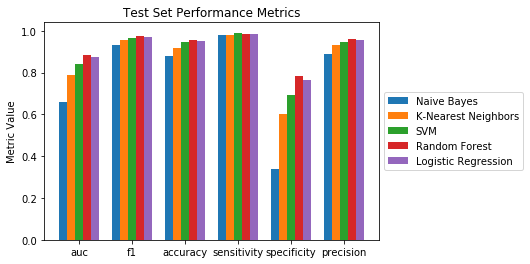

In [834]:
labels=metric_keys
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
gnb_results = ax.bar(x - 2*width, list(gnb_final_metrics.values())[:-1], width, label='Naive Bayes')
knn_results = ax.bar(x - width, list(knn_final_metrics.values())[:-1], width, label='K-Nearest Neighbors')
svm_results = ax.bar(x, list(svm_final_metrics.values())[:-1], width,  label='SVM')
rf_results = ax.bar(x + width, list(rf_final_metrics.values())[:-1], width,  label='Random Forest')
lr_results = ax.bar(x + 2*width, list(lr_final_metrics.values())[:-1], width, label='Logistic Regression')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metric Value')
ax.set_title('Test Set Performance Metrics')
plt.xticks(ticks=x,labels=labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


#fig.tight_layout()

plt.show()

## CV Performance Chart

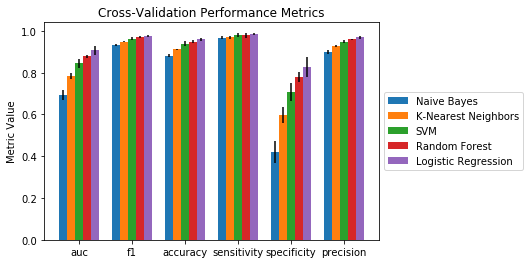

In [835]:
labels=metric_keys
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

gnb_mean_metrics = [gnb_cv_stats["test_"+l+"_mean"] for l in labels]
gnb_std_metrics = [gnb_cv_stats["test_"+l+"_std"] for l in labels]
svm_mean_metrics = [svm_cv_stats["test_"+l+"_mean"] for l in labels]
svm_std_metrics = [svm_cv_stats["test_"+l+"_std"] for l in labels]
rf_mean_metrics = [rf_cv_stats["test_"+l+"_mean"] for l in labels]
rf_std_metrics = [rf_cv_stats["test_"+l+"_std"] for l in labels]
lr_mean_metrics = [lr_cv_stats["test_"+l+"_mean"] for l in labels]
lr_std_metrics = [lr_cv_stats["test_"+l+"_std"] for l in labels]
knn_mean_metrics = [knn_cv_stats["test_"+l+"_mean"] for l in labels]
knn_std_metrics = [knn_cv_stats["test_"+l+"_std"] for l in labels]

fig, ax = plt.subplots()
gnb_results = ax.bar(x - 2*width, gnb_mean_metrics, width,yerr=gnb_std_metrics, label='Naive Bayes')
knn_results = ax.bar(x - width, knn_mean_metrics, width,yerr=knn_std_metrics, label='K-Nearest Neighbors')
svm_results = ax.bar(x, svm_mean_metrics, width, yerr=svm_std_metrics, label='SVM')
rf_results = ax.bar(x + width, rf_mean_metrics, width, yerr=rf_std_metrics, label='Random Forest')
lr_results = ax.bar(x + 2*width, lr_mean_metrics, width,yerr=lr_std_metrics, label='Logistic Regression')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metric Value')
ax.set_title('Cross-Validation Performance Metrics')
plt.xticks(ticks=x,labels=labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


#fig.tight_layout()

plt.show()

## ROC Curve of Final Models

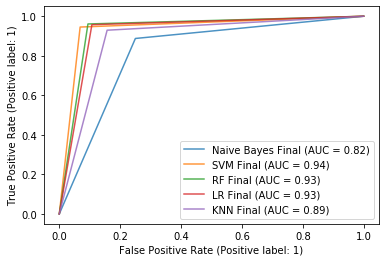

In [821]:
from sklearn.metrics import RocCurveDisplay

ax = plt.gca()
roc_gnb = RocCurveDisplay.from_predictions(gnb_final_y_pred, Y_test, ax=ax, alpha=0.8,name="Naive Bayes Final")
roc_svm = RocCurveDisplay.from_predictions(svm_final_y_pred, Y_test, ax=ax, alpha=0.8,name="SVM Final")
roc_rf = RocCurveDisplay.from_predictions(rf_final_y_pred,Y_test, ax=ax, alpha=0.8,name="RF Final")
roc_lr = RocCurveDisplay.from_predictions(lr_final_y_pred,Y_test, ax=ax, alpha=0.8,name="LR Final")
roc_knn = RocCurveDisplay.from_predictions(knn_final_y_pred,Y_test, ax=ax, alpha=0.8,name="KNN Final")
plt.show()

## Final Models with Hyperparameter Tuning

In [822]:
svmht_final_y_pred = svm_rs.predict(X_test_scaled)
svmht_final_metrics = p1_metrics(Y_test, svmht_final_y_pred)
print("SVM HT Final Metrics")
for metric in svmht_final_metrics:
    print(metric+":",svmht_final_metrics[metric])

SVM HT Final Metrics
auc: 0.9525042841564106
f1: 0.9857006673021925
accuracy: 0.9758842443729904
sensitivity: 0.9866412213740458
specificity: 0.9183673469387755
precision: 0.9847619047619047
confusion_matrix: [[ 90   8]
 [  7 517]]


In [823]:
rfht_final_y_pred = rf_rs.predict(X_test)
rfht_final_metrics = p1_metrics(Y_test, rfht_final_y_pred)
print("RF HT Final Metrics")
for metric in rfht_final_metrics:
    print(metric+":",rfht_final_metrics[metric])

RF HT Final Metrics
auc: 0.8963818351768188
f1: 0.9754716981132077
accuracy: 0.9581993569131833
sensitivity: 0.9866412213740458
specificity: 0.8061224489795918
precision: 0.9645522388059702
confusion_matrix: [[ 79  19]
 [  7 517]]


In [824]:
knnht_final_y_pred = knn_rs.predict(X_test)
knnht_final_metrics = p1_metrics(Y_test, knnht_final_y_pred)
print("KNN HT Final Metrics")
for metric in knnht_final_metrics:
    print(metric+":",knnht_final_metrics[metric])

KNN HT Final Metrics
auc: 0.8294321545412058
f1: 0.9587242026266417
accuracy: 0.9292604501607717
sensitivity: 0.9751908396946565
specificity: 0.6836734693877551
precision: 0.9428044280442804
confusion_matrix: [[ 67  31]
 [ 13 511]]


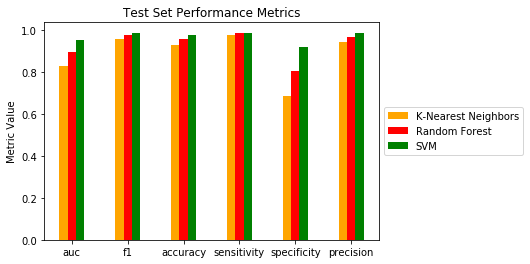

In [839]:
labels=metric_keys
x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()

knn_results = ax.bar(x - width, list(knnht_final_metrics.values())[:-1], width, label='K-Nearest Neighbors HT', color='orange')
rf_results = ax.bar(x, list(rfht_final_metrics.values())[:-1], width,  label='Random Forest HT', color='red')
svm_results = ax.bar(x + width, list(svmht_final_metrics.values())[:-1], width,  label='SVM HT', color='green')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metric Value')
ax.set_title('Hyperparameter Tuning Performance Metrics')
plt.xticks(ticks=x,labels=labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


#fig.tight_layout()

plt.show()

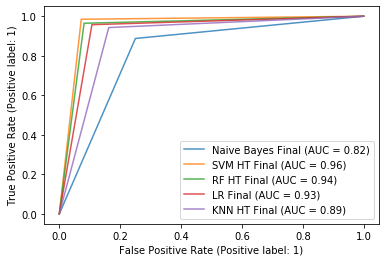

In [825]:
ax = plt.gca()
roc_gnb = RocCurveDisplay.from_predictions(gnb_final_y_pred, Y_test, ax=ax, alpha=0.8,name="Naive Bayes Final")
roc_svm = RocCurveDisplay.from_predictions(svmht_final_y_pred, Y_test, ax=ax, alpha=0.8,name="SVM HT Final")
roc_rf = RocCurveDisplay.from_predictions(rfht_final_y_pred,Y_test, ax=ax, alpha=0.8,name="RF HT Final")
roc_lr = RocCurveDisplay.from_predictions(lr_final_y_pred,Y_test, ax=ax, alpha=0.8,name="LR Final")
roc_knn = RocCurveDisplay.from_predictions(knnht_final_y_pred,Y_test, ax=ax, alpha=0.8,name="KNN HT Final")
plt.show()